### TEM Beta Lactamase Analysis 002 Network Image

In [24]:
%reload_ext autoreload
%autoreload 2
import os
import sys
import time
import py4cytoscape as p4c
from pyeed.core import ProteinRecord
from pyeed.network import SequenceNetwork
import networkx as nx
import matplotlib.pyplot as plt
from py4cytoscape import gen_node_color_map, gen_node_size_map, scheme_c_number_continuous

[IPKernelApp] 
*** MESSAGE TYPE:execute_request***
[IPKernelApp]    Content: {'silent': False, 'store_history': True, 'user_expressions': {}, 'allow_stdin': True, 'stop_on_error': False, 'code': '%reload_ext autoreload\n%autoreload 2\nimport os\nimport sys\nimport time\nimport py4cytoscape as p4c\nfrom pyeed.core import ProteinRecord\nfrom pyeed.network import SequenceNetwork\nimport networkx as nx\nimport matplotlib.pyplot as plt\nfrom py4cytoscape import gen_node_color_map, gen_node_size_map, scheme_c_number_continuous'}
   --->
   
[IPKernelApp] execute_request: {'header': {'date': datetime.datetime(2024, 5, 8, 10, 3, 27, 13000, tzinfo=tzutc()), 'msg_id': 'd3e3bdaf-527d-4598-9ee4-cc8dd9b871ad', 'msg_type': 'execute_request', 'session': '102ed461-f66c-457f-8d58-a5aee7e4fd5c', 'username': '469eee1b-bbf2-4757-b7e2-bb56a87dd589', 'version': '5.2'}, 'msg_id': 'd3e3bdaf-527d-4598-9ee4-cc8dd9b871ad', 'msg_type': 'execute_request', 'parent_header': {}, 'metadata': {'cellId': 'vscode-noteboo

In [25]:
import logging
%config Application.log_level='DEBUG'
logging.getLogger().setLevel(logging.DEBUG)
log = logging.getLogger()
log.debug('Test debug')

logging.getLogger().setLevel(logging.DEBUG)

[IPKernelApp] 
*** MESSAGE TYPE:execute_request***
[IPKernelApp]    Content: {'silent': False, 'store_history': True, 'user_expressions': {}, 'allow_stdin': True, 'stop_on_error': False, 'code': "import logging\n%config Application.log_level='DEBUG'\nlogging.getLogger().setLevel(logging.DEBUG)\nlog = logging.getLogger()\nlog.debug('Test debug')\n\nlogging.getLogger().setLevel(logging.DEBUG)"}
   --->
   
[IPKernelApp] execute_request: {'header': {'date': datetime.datetime(2024, 5, 8, 10, 3, 28, 395000, tzinfo=tzutc()), 'msg_id': '95610124-bc66-4226-bd03-5140c31606fb', 'msg_type': 'execute_request', 'session': '102ed461-f66c-457f-8d58-a5aee7e4fd5c', 'username': '469eee1b-bbf2-4757-b7e2-bb56a87dd589', 'version': '5.2'}, 'msg_id': '95610124-bc66-4226-bd03-5140c31606fb', 'msg_type': 'execute_request', 'parent_header': {}, 'metadata': {'cellId': 'vscode-notebook-cell:/home/niklas/Desktop/Job_Niklas/TEM-lactamase/004_TEM_Beta_Lactamase_Network_Image.ipynb#X60sZmlsZQ%3D%3D'}, 'content': {'sil

DEBUG:root:Test debug

[IPKernelApp] {'header': {'msg_id': '715ee8a0-19d1c8822800e72588b95a91_27750_37335', 'msg_type': 'execute_reply', 'username': 'niklas', 'session': '715ee8a0-19d1c8822800e72588b95a91', 'date': datetime.datetime(2024, 5, 8, 10, 3, 29, 11265, tzinfo=datetime.timezone.utc), 'version': '5.3'}, 'msg_id': '715ee8a0-19d1c8822800e72588b95a91_27750_37335', 'msg_type': 'execute_reply', 'parent_header': {'date': datetime.datetime(2024, 5, 8, 10, 3, 28, 395000, tzinfo=tzutc()), 'msg_id': '95610124-bc66-4226-bd03-5140c31606fb', 'msg_type': 'execute_request', 'session': '102ed461-f66c-457f-8d58-a5aee7e4fd5c', 'username': '469eee1b-bbf2-4757-b7e2-bb56a87dd589', 'version': '5.2'}, 'content': {'status': 'ok', 'execution_count': 25, 'user_expressions': {}, 'payload': []}, 'metadata': {'started': datetime.datetime(2024, 5, 8, 10, 3, 28, 523256, tzinfo=datetime.timezone.utc), 'dependencies_met': True, 'engine': 'e3ba643b-9879-4154-ac5c-1efd8887415d', 'status': 'ok'}, 'tracker': <zmq.sugar.tracker.MessageTr

##### reading in the files and alignments

In [26]:
mat_accessions = 'ANG21639,ANG12548,WP_129557708,ANG18776,ANG16013,ANG17639,ANG31811,ANG34149,ANG22502'.split(',')
mats = ProteinRecord.get_ids(mat_accessions)

[IPKernelApp] 
*** MESSAGE TYPE:execute_request***
[IPKernelApp]    Content: {'silent': False, 'store_history': True, 'user_expressions': {}, 'allow_stdin': True, 'stop_on_error': False, 'code': "mat_accessions = 'ANG21639,ANG12548,WP_129557708,ANG18776,ANG16013,ANG17639,ANG31811,ANG34149,ANG22502'.split(',')\nmats = ProteinRecord.get_ids(mat_accessions)"}
   --->
   
[IPKernelApp] execute_request: {'header': {'date': datetime.datetime(2024, 5, 8, 10, 3, 29, 18000, tzinfo=tzutc()), 'msg_id': 'e5499cf5-427f-426c-9e18-88cb5df8c2bc', 'msg_type': 'execute_request', 'session': '102ed461-f66c-457f-8d58-a5aee7e4fd5c', 'username': '469eee1b-bbf2-4757-b7e2-bb56a87dd589', 'version': '5.2'}, 'msg_id': 'e5499cf5-427f-426c-9e18-88cb5df8c2bc', 'msg_type': 'execute_request', 'parent_header': {}, 'metadata': {'cellId': 'vscode-notebook-cell:/home/niklas/Desktop/Job_Niklas/TEM-lactamase/004_TEM_Beta_Lactamase_Network_Image.ipynb#X55sZmlsZQ%3D%3D'}, 'content': {'silent': False, 'store_history': True, 'u

DEBUG:pyeed.fetch.proteinfetcher:DB entries: defaultdict(<class 'list'>, {'NCBI': ['ANG21639', 'ANG22502', 
'ANG12548', 'WP_129557708', 'ANG18776', 'ANG16013', 'ANG17639', 'ANG31811', 'ANG34149']})

DEBUG:pyeed.fetch.proteinfetcher:IDs: ['ANG21639', 'ANG12548', 'WP_129557708', 'ANG18776', 'ANG16013', 'ANG17639', 
'ANG31811', 'ANG34149', 'ANG22502']

Output()

DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False

DEBUG:httpx:load_verify_locations 
cafile='/home/niklas/anaconda3/envs/pyeed/lib/python3.11/site-packages/certifi/cacert.pem'

DEBUG:pyeed.fetch.requester:Creating 1 tasks

DEBUG:pyeed.fetch.requester:Sending 1 requests

DEBUG:pyeed.fetch.requester:Sending request to 
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&retmode=text&rettype=genbank&id=ANG21639,ANG22
502,ANG12548,WP_129557708,ANG18776,ANG16013,ANG17639,ANG31811,ANG34149

DEBUG:httpcore.connection:connect_tcp.started host='eutils.ncbi.nlm.nih.gov' port=443 local_address=None timeout=30
socket_options=None

DEBUG:httpcore.connection:connect_tcp.complete return_value=<httpcore._backends.anyio.AnyIOStream object at 
0x751f2bd5aa50>

DEBUG:httpcore.connection:start_tls.started ssl_context=<ssl.SSLContext object at 0x751f2a845880> 
server_hostname='eutils.ncbi.nlm.nih.gov' timeout=30

DEBUG:httpcore.connection:start_tls.complete return_value=<httpcore._backends.anyio.AnyIOStream object at 
0x751f29b39350>

DEBUG:httpcore.http11:send_request_headers.started request=<Request [b'GET']>

DEBUG:httpcore.http11:send_request_headers.complete

DEBUG:httpcore.http11:send_request_body.started request=<Request [b'GET']>

DEBUG:httpcore.http11:send_request_body.complete

DEBUG:httpcore.http11:receive_response_headers.started request=<Request [b'GET']>

DEBUG:httpcore.http11:receive_response_headers.complete return_value=(b'HTTP/1.1', 500, b'Internal Server Error', 
[(b'Date', b'Wed, 08 May 2024 10:03:49 GMT'), (b'Server', b'Finatra'), (b'Strict-Transport-Security', 
b'max-age=31536000; includeSubDomains; preload'), (b'Content-Security-Policy', b'upgrade-insecure-requests'), 
(b'Referrer-Policy', b'origin-when-cross-origin'), (b'Content-Type', b'application/json'), (b'content-length', 
b'126'), (b'content-encoding', b'gzip'), (b'X-RateLimit-Limit', b'3'), (b'X-RateLimit-Remaining', b'2'), 
(b'Access-Control-Expose-Headers', b'X-RateLimit-Limit,X-RateLimit-Remaining'), (b'X-UA-Compatible', b'IE=Edge'), 
(b'X-XSS-Protection', b'1; mode=block'), (b'Connection', b'close')])

INFO:httpx:HTTP Request: GET 
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&retmode=text&rettype=genbank&id=ANG21639,ANG22
502,ANG12548,WP_129557708,ANG18776,ANG16013,ANG17639,ANG31811,ANG34149 "HTTP/1.1 500 Internal Server Error"

DEBUG:httpcore.http11:receive_response_body.started request=<Request [b'GET']>

DEBUG:httpcore.http11:receive_response_body.complete

DEBUG:httpcore.http11:response_closed.started

DEBUG:httpcore.http11:response_closed.complete

DEBUG:pyeed.fetch.requester:Received response from 
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&retmode=text&rettype=genbank&id=ANG21639,ANG22
502,ANG12548,WP_129557708,ANG18776,ANG16013,ANG17639,ANG31811,ANG34149. Code: 500

WARNING:pyeed.fetch.requester:Request to 
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&retmode=text&rettype=genbank&id=ANG21639,ANG22
502,ANG12548,WP_129557708,ANG18776,ANG16013,ANG17639,ANG31811,ANG34149 failed with status code 500

WARNING:pyeed.fetch.requester:Response: {"error":"error forwarding 
request","api-key":"2001:7c0:2049:1d5:e511:b876:3882:4560","type":"ip",
"status":"ok"}

KeyError: 'UNIPROT'

[IPKernelApp] Exception in execute request:
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
Cell In[26], line 2
      1 mat_accessions = 'ANG21639,ANG12548,WP_129557708,ANG18776,ANG16013,ANG17639,ANG31811,ANG34149,ANG22502'.split(',')
----> 2 mats = ProteinRecord.get_ids(mat_accessions)

File ~/Desktop/Job_Niklas/pyeed/pyeed/core/proteinrecord.py:254, in ProteinRecord.get_ids(cls, accession_ids)
    250 import nest_asyncio
    252 nest_asyncio.apply()
--> 254 return asyncio.run(
    255     ProteinFetcher(ids=accession_ids).fetch(force_terminal=False)
    256 )

File ~/anaconda3/envs/pyeed/lib/python3.11/site-packages/nest_asyncio.py:30, in _patch_asyncio.<locals>.run(main, debug)
     28 task = asyncio.ensure_future(main)
     29 try:
---> 30     return loop.run_until_complete(task)
     31 finally:
     32     if not task.done():

File ~/anaconda3/envs/pyeed/lib/python3.11/site-pac

In [ ]:
mats

[ProteinRecord(id='ANG21639.1', uri=None, accession_id=None, name='beta-lactamase TEM-1 variant', organism=Organism(id='2c200b7f-0f90-4649-a255-b49ccdd307c1', taxonomy_id=32630, name='synthetic construct', domain=None, kingdom=None, phylum=None, tax_class=None, order=None, family=None, genus=None, species=None, json_ld_type=['Organism'], json_ld_context={'Organism': 'https://github.com/PyEED/pyeed/Organism', 'taxonomy_id': 'http://edamontology.org/data_1179', 'name': 'http://edamontology.org/data_2909', 'kingdom': 'http://edamontology.org/data_1044', 'family': 'http://edamontology.org/data_2732', 'genus': 'http://edamontology.org/data_1870', 'species': 'http://edamontology.org/data_1045'}), sequence='MSIQCFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW', r

In [ ]:
%reload_ext autoreload
%autoreload 2
n_hits = 30
e_value = 0.05
current_path = os.path.dirname(os.getcwd())
starting_protein_tem = ProteinRecord.get_id("QGC48744.1")
print(starting_protein_tem)
starting_protein_tem.ncbi_blast(n_hits=n_hits, e_value=e_value)

Output()

WARNING:pyeed.fetch.requester:Request to 
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&retmode=text&rettype=genbank&id=WP_000311242,A
NG20183,ANG16776,AQZ26952,HAJ4137360,ANG15030,ANG20817,WP_000027057,HBT6900611,ANG16975 failed with status code 500

WARNING:pyeed.fetch.requester:Response: {"error":"error forwarding 
request","api-key":"2001:7c0:2049:1d5:e511:b876:3882:4560","type":"ip",
"status":"ok"}

WARNING:pyeed.fetch.requester:Request to 
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&retmode=text&rettype=genbank&id=ANG14403,WP_11
5480124,ANG13543,ANG34358,ANG13625,HAU6937112,ANG22143,ANG20957,WP_021312644,ANG13499 failed with status code 500

WARNING:pyeed.fetch.requester:Response: {"error":"error forwarding 
request","api-key":"2001:7c0:2049:1d5:e511:b876:3882:4560","type":"ip",
"status":"ok"}

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# read in the saved fetched results
name = starting_protein_tem.source_id.replace('.', '')
read_blast_folder = os.path.join(current_path, "TEM-lactamase", "data", "data_blast_search_{}_{}_{}".format(name, n_hits, int(e_value*1000)))
protein_list = []
for file in os.listdir(read_blast_folder):
    with open(os.path.join(read_blast_folder, file), "r") as f:
        protein_list.append(ProteinInfo.from_json(f))

In [ ]:
# check for duplicates in the protein list
seen = set()
protein_list_clean = []
for protein in protein_list:
    if protein.source_id in seen:
        print("Duplicate found: {}".format(protein.source_id))
    else:
        protein_list_clean.append(protein)
    seen.add(protein.source_id)

print(len(protein_list_clean))
print(len(protein_list))


Duplicate found: ANG20817.1
31
32


#### Actual Network Work

In [ ]:
# check if the cytocope connection is working and is valid
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [ ]:
# create a network with the SequencNetwork class
network = SequenceNetwork(
    sequences=protein_list_clean,
    weight="identity",
    threshold=0.9,
    dimensions=2,
    color="taxonomy_id",
)


In [ ]:
network.create_networkx_graph()

⛓️ Running pairwise alignments: 100%|██████████| 465/465 [00:01<00:00, 297.46it/s]


In [ ]:
network.json()

'{"sequences": [{"id": "proteininfo33", "source_id": "ANG20817.1", "name": "beta-lactamase TEM-1 variant", "sequence": "MSIQHSRAALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW", "organism": {"id": "organism41", "name": "synthetic construct", "taxonomy_id": "32630", "domain": null, "kingdom": null, "phylum": null, "tax_class": null, "order": null, "family": null, "genus": null, "species": "synthetic construct"}, "citation": {"id": "citation1", "doi": null, "pubmed_id": null, "medline_id": null, "year": null, "authors": []}, "family_name": null, "regions": [{"id": "proteinregion4", "name": "PRK15442", "spans": [{"id": "span7", "start": 2, "end": 286}], "note": "beta-lactamase TEM; Provisional", "cross_reference": "CDD:185339", "type": null}], "sites": [], "codi

In [ ]:
SequenceNetwork.from_json(network.json())

AttributeError: type object 'SequenceNetwork' has no attribute 'from_json'

In [ ]:
network.create_cytoscope_graph(collection="TEM-lactamase", title="TEM-lactamase-003")

You are connected to Cytoscape!


⛓️ Running pairwise alignments: 100%|██████████| 465/465 [00:07<00:00, 66.20it/s]


Processing Sequences in for loop
Adding in networx
nodes added 
Processing Pairs in for loop
Adding in networx
edges added 
Applying default style...
Applying preferred layout


In [ ]:
df_nodes = p4c.get_table_columns(table='node')
df_edges = p4c.get_table_columns(table='edge')
print('DF nodes:', df_nodes.columns)
# print('DF edges:', df_edges.head())

DF nodes: Index(['SUID', 'shared name', 'id', 'degree_all', 'family_name', 'domain',
       'kingdom', 'phylum', 'tax_class', 'order', 'family', 'genus', 'species',
       'ec_number', 'mol_weight', 'taxonomy_id', 'betweenness', 'x_pos',
       'y_pos', 'z_pos', 'name', 'selected'],
      dtype='object')


In [ ]:
data = nx.node_link_data(network.graph)

⛓️ Running pairwise alignments: 100%|██████████| 465/465 [00:00<00:00, 15811.01it/s]


Processing Sequences in for loop
Adding in networx
nodes added 
Processing Pairs in for loop
Adding in networx
edges added 


In [ ]:
import json
with open('data.json', 'w') as f:
    json.dump(nx.node_link_data(network.graph), f)

⛓️ Running pairwise alignments: 100%|██████████| 465/465 [00:00<00:00, 11936.79it/s]


Processing Sequences in for loop
Adding in networx
nodes added 
Processing Pairs in for loop
Adding in networx
edges added 


In [ ]:
# layout_name: str="force-directed", properties_dict: dict={"defaultSpringCoefficient": 4e-5, "defaultSpringLength": 100, "defaultNodeMass": 3, "numIterations": 50,}
layout_name = 'force-directed'
properties_dict = {"defaultSpringCoefficient": 4e-5, "defaultSpringLength": 100, "defaultNodeMass": 3, "numIterations": 100,}

p4c.layout_network(layout_name)
# ['numIterations', 'defaultSpringCoefficient', 'defaultSpringLength', 'defaultNodeMass', 'isDeterministic', 'singlePartition']
p4c.set_layout_properties(layout_name=layout_name, properties_dict=properties_dict)

p4c.scale_layout(axis='Both Axis', scale_factor=1.0)
''

''

In [ ]:
p4c.get_layout_names()

['attribute-circle',
 'stacked-node-layout',
 'attribute-grid',
 'degree-circle',
 'circular',
 'attributes-layout',
 'kamada-kawai',
 'force-directed',
 'cose',
 'grid',
 'hierarchical',
 'fruchterman-rheingold',
 'isom']

{}

In [ ]:
############## COLOR NODES ################
style_name = 'niklas_node_color_style'
color_by = 'species'
data_color_names = list(set(df_nodes[color_by]))

# matplotlib has several colormaps. Here we use 'tab20', which is good for categorical data
colors = plt.cm.tab20(range(len(data_color_names)))
hex_colors = ['#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in colors]

# Convert RGB to hex colors for py4cytoscape
hex_colors = ['#' + ''.join([f'{int(c*255):02x}' for c in color[:3]]) for color in colors]

if not (style_name in p4c.get_visual_style_names()):
    p4c.create_visual_style(style_name)

p4c.set_node_color_default('#FFFFFF', style_name)
p4c.set_node_color_mapping(color_by, mapping_type='discrete', default_color='#654321', style_name=style_name, table_column_values=data_color_names, colors=hex_colors)

''

In [ ]:
############## NODES ################
p4c.set_node_shape_default('ELLIPSE', style_name)
p4c.set_node_size_mapping(**gen_node_size_map('degree_all', scheme_c_number_continuous(10, 40), mapping_type='c', style_name=style_name))
p4c.set_node_label_mapping('name', style_name=style_name)
p4c.set_node_font_size_mapping(**gen_node_size_map('degree_all', scheme_c_number_continuous(0, 4), style_name=style_name))

''

In [ ]:
p4c.set_visual_style(style_name)

{'message': 'Visual Style applied.'}

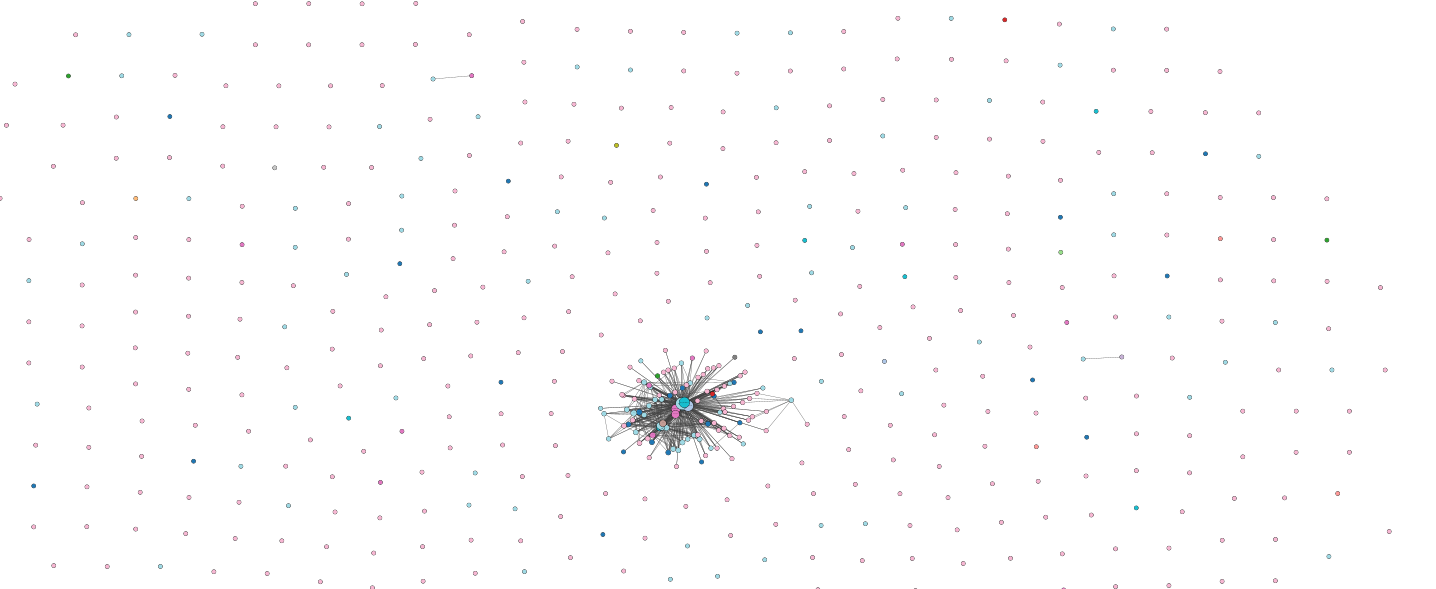

In [ ]:
time.sleep(1)
p4c.notebook_export_show_image(filename="test_image_002", type="png", resolution=600, zoom=100.0, overwrite_file=True)

In [ ]:
%reload_ext autoreload
%autoreload 2
import pyeed.utility.IDGenerator as IDGenerator

In [ ]:
IDGenerator

pyeed.utility.IDGenerator.IDGenerator

In [ ]:
a = IDGenerator("autherIndex")

In [ ]:
import py4cytoscape as p4c

p4c.get_filter_list()

['Default filter', 'threshold']

In [ ]:
import re

def extract_git_url(line):
    """Extracts a git URL and optional branch name from a line."""
    match = re.search(r"https://github\.com/([^/@]+/[^/@]+)(?:@([^#]+))?", line)
    if match:
        repo, branch = match.groups()
        print(branch)
        branch = branch or "main"  # Default to 'main' if branch is not specified
        print(repo, branch)
        return f"https://github.com/{repo}", branch

In [ ]:
line = 'pyeed @ git+https://github.com/PyEED/pyeed@refactor_sequenceNetwork-%2355'

extract_git_url(line)


refactor_sequenceNetwork-%2355
PyEED/pyeed refactor_sequenceNetwork-%2355


('https://github.com/PyEED/pyeed', 'refactor_sequenceNetwork-%2355')

In [ ]:
import re

def add_prefix_to_numbers(input_string):
    # Regular expression to find numbers
    pattern = r'\d+'
    
    # Function to add "%23" before each number
    def add_prefix(match):
        return f"%23{match.group(0)}"
    
    # Replace each number in the string with "%23" followed by the number
    modified_string = re.sub(pattern, add_prefix, input_string)
    
    return modified_string

# Example usage
input_string = "There are 12 months in a year and 365 days in most years."
result = add_prefix_to_numbers(input_string)
print(result)


There are %2312 months in a year and %23365 days in most years.
